# 深度学习基础     
## 线性回归          
- **矢量计算表达式**

In [1]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
from time import time
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline

a = torch.ones(1000)
b = torch.ones(1000)

start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time()-start)

0.01676487922668457


In [2]:
start = time()
d = a+b
print(time()-start)

0.0


## 线性回归实现 

In [3]:
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.randn(num_examples,num_inputs,
                      dtype = torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)


In [6]:
print(features[0], labels[0])

tensor([-0.9278, -1.9696]) tensor(9.0434)


In [5]:
display.set_matplotlib_formats("svg")

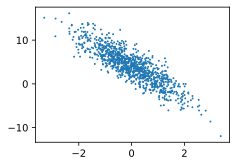

In [6]:
def use_svg_display():
    display.set_matplotlib_formats("svg")
    
def set_figsize(figsize = (3.5,2.5)):
    use_svg_display()
    plt.rcParams["figure.figsize"] = figsize 


set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

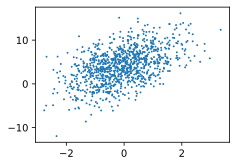

In [7]:
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1);

In [8]:
# yield:生成器的返回
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)

In [9]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print("tensor_X:",X,
          "\n X_shape:",X.shape,
          "\n tensor_y:" ,y,
          "\n y_shape:",y.shape)
    break

tensor_X: tensor([[-0.1070,  0.4990],
        [-0.2716, -0.3684],
        [-0.2149,  2.5650],
        [-0.9442, -0.3923],
        [-1.5741, -0.5745],
        [ 1.1693, -0.4668],
        [ 0.2139,  0.1657],
        [-1.8688,  0.3063],
        [-0.5729,  0.0789],
        [ 0.6173,  1.0625]]) 
 X_shape: torch.Size([10, 2]) 
 tensor_y: tensor([ 2.2793,  4.9225, -4.9644,  3.6363,  2.9845,  8.1264,  4.0492, -0.5653,
         2.7738,  1.8290]) 
 y_shape: torch.Size([10])


- **初始化参数与定义模型**

In [10]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype = torch.float32)
b = torch.zeros(1,dtype = torch.float32)
w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)


def linreg(X,w,b):
    return torch.mm(X,w)+b

`torch.mm(input, mat2, \*, out=None) → Tensor`          
执行`input`和`mat2`的矩阵乘法                    
如果`input` 是$(n \times m)$ 的tensor,` mat2 `是$(m \times p)$的tensor, 会输出一个$(n \times p)$tensor.


- **定义损失函数与优化算法**

In [11]:
def squared_loss(y_hat,y):
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat-y.view(y_hat.size()))**2/2   

def sgd(params,lr,batch_size):
    for param in params:
        param.data -=lr*param.grad/batch_size
        # 注意这里更改param时用的param.data

- **训练模型**

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        
        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    train_l = loss(net(features,w,b),labels)
    print("epoch %d,loss %f"%(epoch,train_l.mean().item()))

print(true_w, '\n', w)
print(true_b, '\n', b)

epoch 0,loss 0.046405
epoch 1,loss 0.000208
epoch 2,loss 0.000054
[2, -3.4] 
 tensor([[ 1.9997],
        [-3.3999]], requires_grad=True)
4.2 
 tensor([4.1992], requires_grad=True)


##  线性回归简洁实现      
- **生成数据集与读取数据**       

`PyTorch`提供了`data`包来读取数据。由于data常用作变量名，我们将导入的data模块用Data代替。在每一次迭代中，将随机读取包含10个数据样本的小批量。

In [13]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2

features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b

labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [14]:
import torch.utils.data as Data

batch_size = 10
dataset = Data.TensorDataset(features,labels)
# batchsize的设置在DataLoader完成
data_iter = Data.DataLoader(dataset,batch_size,shuffle = True)

for X,y in data_iter:
    print(X,y)
    break

tensor([[ 0.6428,  0.9317],
        [ 1.9147,  1.5186],
        [ 0.4067, -0.7853],
        [ 1.4565,  0.2734],
        [ 2.3571,  1.0622],
        [-1.5450, -0.6409],
        [ 0.6606,  0.0745],
        [ 0.1435,  0.4207],
        [-1.7976,  0.9673],
        [-0.7328, -0.4784]]) tensor([ 2.3104,  2.8621,  7.6927,  6.1900,  5.3120,  3.2782,  5.2582,  3.0522,
        -2.6888,  4.3621])


- **定义模型**

torch提供了大量预定义的层。        

torch.nn的核心数据结构是Module，它是一个抽象概念，既可以表示神经网络中的某个层（layer），也可以表示一个包含很多层的神经网络。在实际使用中，最常见的做法是**继承nn.Module，撰写自己的网络/层。**        

一个nn.Module实例应该包含一些层以及返回输出的前向传播（forward）方法。

In [15]:
import torch.nn as nn     

class LinearNet(nn.Module):
    def __init__(self, n_feature):
        #super(LinearNet, self).__init__()
        super().__init__()
        self.linear = nn.Linear(n_feature, 1)
    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net) # 使用print可以打印出网络的结构

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


事实上我们还可以用```nn.Sequential```来更加方便地搭建网络，```Sequential```是一个有序的容器，网络层将按照在传入```Sequential```的顺序依次被添加到计算图中。


In [16]:
# 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处还可以传入其他层
    )

# 写法二
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# 写法三
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
          # ......
        ]))

print(net)
print(net[0])

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


可以通过```net.parameters()```来查看模型所有的可学习参数，此函数将返回一个生成器。

注意：```torch.nn```仅支持输入一个batch的样本不支持单个样本输入，如果只有单个样本，可使用```input.unsqueeze(0)```来添加一维。

In [17]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.6717,  0.0205]], requires_grad=True)
Parameter containing:
tensor([0.4987], requires_grad=True)


- **初始化模型参数**    
在使用``net``前，我们需要初始化模型参数，如线性回归模型中的权重和偏差。`PyTorch`在`init`模块中提供了多种参数初始化方法。          

这里的`init`是`initializer`的缩写形式。我们通过`init.normal_`将权重参数每个元素初始化为`随机采样于均值为0、标准差为0.01的正态分布`。`偏差会初始化为零`。

In [18]:
from torch.nn import init
init.normal_(net[0].weight,mean = 0,std = 0.01)
init.constant_(net[0].bias,val = 0)
# 也可以直接修改bias的data: net[0].bias.data.fill_(0)

Parameter containing:
tensor([0.], requires_grad=True)

注：如果这里的net是用继承的方法自定义的，那么上面代码会报错，``net[0]``.``weight``应改为`net.linear.weight`，`bias`亦然。因为`net[0]`这样根据**下标访问子模块**的写法只有当`net`是个`ModuleList`或者`Sequential`实例时才可以。

- **定义损失函数与优化算法**    

PyTorch在nn模块中提供了各种损失函数，这些损失函数可看作是**一种特殊的层**，PyTorch也将这些损失函数实现为``nn.Module``的子类。


`torch.optim`模块提供了很多常用的优化算法比如`SGD`、`Adam`和`RMSProp`等。

In [19]:
loss = nn.MSELoss()
# print(loss(torch.tensor(np.array([[1]])),
#            torch.tensor(np.array([[0.5]]))))

import torch.optim as optim
optimizer = optim.SGD(net.parameters(),lr = 0.03)#指定学习率为0.03
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


可以为不同子网络设置不同的学习率，这在`finetune`时经常用到
```
optimizer =optim.SGD([
                # 如果对某个参数不指定学习率，就使用最外层的默认学习率
                {'params': net.subnet1.parameters()}, # lr=0.03
                {'params': net.subnet2.parameters(), 'lr': 0.01}
            ], lr=0.03)
```

- **不想让学习率固定成一个常数**      

1. 一种是修改optimizer.param_groups中对应的学习率  


2. 另一种是更简单也是**较为推荐的做法——新建优化器**，由于optimizer十分轻量级，构建开销很小，故而可以构建新的optimizer。但是后者**对于使用动量的优化器（如Adam），会丢失动量等状态信息**，可能会造成**损失函数的收敛出现震荡**等情况。
```
# 调整学习率
for param_group in optimizer.param_groups:
    param_group['lr'] *= 0.1 # 学习率为之前的0.1倍  
```

In [20]:
num_epochs = 10
for epoch in range(1,num_epochs+1):
    for X,y in data_iter:
        output = net(X)
        l = loss(output,y.view(-1,1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.000150
epoch 2, loss: 0.000052
epoch 3, loss: 0.000063
epoch 4, loss: 0.000108
epoch 5, loss: 0.000080
epoch 6, loss: 0.000055
epoch 7, loss: 0.000143
epoch 8, loss: 0.000159
epoch 9, loss: 0.000096
epoch 10, loss: 0.000107
